# TP 7: Analyse et applications

## 1. Retour sur la méthode de point fixe

On cherche à trouver un point fixe de la fonction $g(x)=e^{-x}$.

1. Tracez la courbe de $g(x)$ ainsi que de la droite d'équation $y=x$ sur $[0,1]$

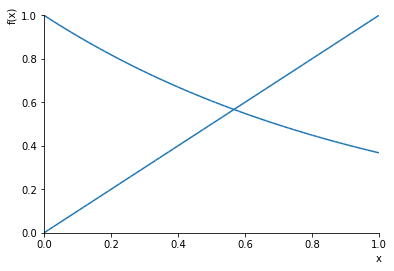

In [1]:
from matplotlib import pyplot as plt
from sympy import *
#init_printing()
%matplotlib inline

x=symbols('x')
f=Lambda(x,E**(-x))
p1 = plot(E**-x,x,(x,0,1), ylim =(0,1))
p1

On cherche à appliquer la méthode de point fixe par approximations successives de la suite $(x_n)$ définie par récurrence pour $x_0$ fixé et $x_{n+1}=g(x_n)$ pour une fonction réelle $g$. 

Le nombre de termes de $(x_n)$ à calculer n'est pas connu a priori. Cependant, si l'erreur absolue à l'ordre $k$ est petite par rapport à la tolérance $\epsilon$, on peut arrêter le calcul.

2. Ecrivez une fonction `PtFixe(g,x,e)` en `Sympy` basée sur la récurence définie ci-dessus. Cette fonction prend en entrée la valeur initiale $x$, la fonction $g$ et la tolérance $e$. Elle retourne le réel $x$ qui approche la solution exacte au problème $g(x)=x$.

In [25]:
def PtFixe(g,x,e):
    g0 = g(x)
    while abs(g0-g(g0)) > e :
        g0 = g(g0)
    return g(g0)
    
PtFixe(f,0.5,0.00001)

0.567140763269807

3. Tracez la courbe de chaque tolérance en fonction du nombre d'itérations. C'est ce qui permet de mesurer expérimentalement la convergence de la méthode

4. Quel est le point fixe de la fonction $g(x)=e^{-x}$? Quelle est la valeur retournée par la fonction `solve` de `Sympy` et comment l'interpréter?

In [41]:
eq = Eq((E**-x)-x,0)
solve(eq,x , implicit = True)
E**-0.567140763269807

## 2. Méthode de la sécante

### 2.1 Motivation

Dans la figure ci-dessous, avec la méthode de la recherche dichotomique, l'approximation à l'étape suivante est $r\in [\frac{a+b}{2},b]$

![](secante.png)

La méthode de la recherche dichotomique est lente. On cherche une méthode qui améliorerait la convergence vers la racine $r$. Une des méthodes consiste à prendre comme approximation à l'étape suivante $r\in [x_1,b]$ pour $x_1$ l'abcisse de l'intersection de la sécante avec l'axe des $x$.

## 2.2 Description de la méthode

Pour une fonction $f$ définie sur un intervalle $[a,b]$ et telle que $f(a)\cdot f(b)<0$, l'idée est de remplacer localement la fonction $f$ par la droite qui passe par les deux points $(a,f(a))$ et $(b,f(b))$. La "méthode de la sécante" est aussi appelée *regula falsi*.

1. Ecrivez l'équation de la droite, appelée sécante, qui passe par les deux points $(a,f(a))$ et $(b,f(b))$ de façon symbolique (i.e. en fonction de $f$, $a$ et $b$). Autrement dit, on cherche symboliquement une équation réduite de droite de la forme $y=m.x+p$, donc les valeurs de la pente $m$ et de $p$, l'ordonnée à l'origine.

In [ ]:
#((f(b)-f(a))/(b-a)x) + f(a) - ((f(b)-f(a))/(b-a)a)

2. Etablissez la formule d'itération de la méthode de la sécante : la première approximation $x_1$ d'un zéro de $f$ est $$x_1=\frac{a.f(b)-b.f(a)}{f(b)-f(a)}$$
Cette formule est obtenue en calculant symboliquement l'intersection de la sécante avec l'axe des abcisses:

$$x_n =\frac{a_n.f(b_n)-b_n.f(a_n)}{f(b_n)-f(a_n)}$$

3. Ecrivez la fonction `secante(f,a,b)` en `Sympy` qui renvoie la valeur de la sécante de $f$ sur $[a,b]$. Celle-ci vous aidera à trouver les approximations successives, par exemple:

In [5]:
def secante(f,a,b):
    return ((a*f(b))-(b*f(a)))/(f(b)-f(a))
h = symbols('f')
x1=secante(h,2,3)
x1

(-3*f(2) + 2*f(3))/(-f(2) + f(3))

4. Expliquez comment on choisit l'intervalle suivant: $[a,x_1]$ ou $[x_1,b]$ ?

Si la fonction est décroissante et on a $a < b$ alors l'intervalle suivant sera $[a,x_1]$ puisque
la prochaine sécante sera celle de la droite passant par $(a,f(a))$ et $(x_1,f(x_1))$
Sinon, la fonctin est croissante et nôtre prochain intervalle sera $[x_1,b]$ et la prochaine sécante appartient à la 
droite passant par $(x_1, f(x_1))$ et $(b, f(b))$

5. Appliquez (en utilisant `Sympy`pour faire vos calculs) la méthode sur la fonction $$f(x)=\frac{x-sin(x)}{2\pi}-0,3$$

5.1 Affichez tout d'abord le graphe de la fonction $f$ sur $[0,6]$

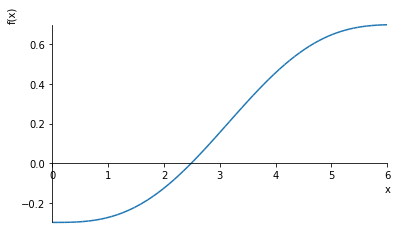

In [2]:
f=Lambda(x,((x-sin(x))/(2*pi))-0.3)
plot(f(x),(x,0,6))

5.2 Utilisez `Sympy` pour définir une fonction d'itération `succ` qui, pour une fonction $f$ et à un intervalle donné $[a_k,b_k]$, fait correspondre l'intervalle emboité suivant $[a_{k+1},b_{k+1}]$. Plus précisément, la fonction `succ(f,a,b)`, appliquée à un intervalle contenant un zéro de la fonction $f$, donne un nouvel intervalle qui est emboité dans l'intervalle donné et qui contient un zéro de $f$. Ce nouvel intervalle est donné par la méthode de la sécante. Autrement dit, la fonction `succ` (comme "successeur de l'intervalle") réalise une itération de la méthode de la sécante.

In [13]:
def succ(f,a,b):
    x1 = secante(f,a,b)
    if f(a)<0 and f(b)>0 :
        return N(x1),N(b)
    else : return N(a),N(x1)
succ(f,2,3)

(2.44919305639247, 3.00000000000000)

5.3 Utilisez la fonction `succ` précédente pour itérer la méthode $n$ fois (et appliquez pour $n=5$ sur l'intervalle $[a,b]$. Ecrivez la fonction `itere(n,a,b)` qui itère $n$ fois `succ` sur l'intervalle $[a,b]$ qui contient la racine

In [23]:
def itere(f,n,a,b):
    aa,bb = a,b
    for i in range(n) :
        s = succ(f,aa,bb)
        aa,bb = s[0],s[1]
    return aa,bb
itere(f,5,2,3)

(2.49078426463533, 3.00000000000000)

In [63]:
itere(f,5,2,3)

6. Comparez le résultat avec la méthode de résolution de `Sympy`

In [19]:
eq = Eq(((x-sin(x))/(2*pi))-0.3,0)
solve(eq,0)

[]

7. (Facultatif) Comparez la vitesse de convergence de la méthode de la sécante avec celle de la dichotomie sur la fonction donnée en application.

In [37]:
def dicoSearch(f,a,b,e):    
    x=(a+b)/2    
    aa,bb,sol,n=a,b,0,0
    ecart = bb-aa
    while abs(f(x)-sol)>e:
        #print(abs(f(x)-sol),e)
        if sign(f(x)) == 0:            
            sol=x            
            #print('solution')       
        elif sign(f(x))==sign(f(aa)): aa=x        
        elif sign(f(x))==sign(f(bb)): bb=x  
        x=(aa+bb)/2     
        n=n+1    
    sol=x    
    return((n,sol))

In [39]:
#dicoSearch(f,2.0,3.0,10*-5)
dicoSearch(lambda x : x*E**x - 1,0.1,0.9,10**-5)

0.175639364649936 1e-05
0.409626895229333 1e-05
0.0932712802343052 1e-05
0.0467108401729325 1e-05
0.0218500529755719 1e-05
0.0127817554598321 1e-05
0.00444554352338145 1e-05
0.00419016120232052 1e-05
0.000122165372714589 1e-05
0.00203537786247288 1e-05
0.000956951419090024 1e-05
0.000417479340162563 1e-05
0.000147678565896037 1e-05
1.27619924996658e-5 1e-05
5.47003410844571e-5 1e-05
2.09688370425010e-5 1e-05


(16, 0.567144775390625)

In [65]:
dicoSearch(f,2.0,3.0,0.00001)

-0.3 + 0.950763927948022/pi 1e-05
-0.735963401556039/pi + 0.3 1e-05
-0.840657484023364/pi + 0.3 1e-05
-0.895078741316428/pi + 0.3 1e-05
-0.922769195742314/pi + 0.3 1e-05
-0.936729275222821/pi + 0.3 1e-05
-0.3 + 0.943737374448041/pi 1e-05
-0.940231006191995/pi + 0.3 1e-05
-0.941983612138791/pi + 0.3 1e-05
-0.3 + 0.942860348933305/pi 1e-05
-0.94242194442286/pi + 0.3 1e-05
-0.3 + 0.94264113765268/pi 1e-05
-0.3 + 0.942531538781058/pi 1e-05


(13, 2.49078369140625)

In [59]:
def regulaSearch(f,a,b,e) :
    n = 0
    s = succ(f,a,b)
    sec = N(secante(f,a,b))
    while abs(f(sec) - s[0])>e :
        print(abs(f(sec) - s[0]))
        n+=1
        s = succ(f,s[0],s[1])
        sec = N(secante(f,s[0],s[1]))
        
    return n,sec
    

In [67]:
itere(f,5,2,3)

(2.49078426463533, 3.00000000000000)